In [307]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame

import matplotlib.pyplot as plt 
import seaborn as sns

In [308]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
# info about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we see that we are missing a lot of information in the 'Age' and 'Cabin' column.

<Axes: >

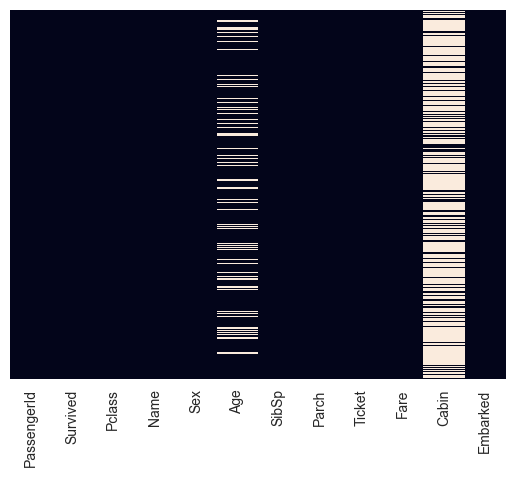

In [310]:
# visualizing the NaN values
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False)

# the white strips are indicating the missing values

In [311]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [312]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean value indicates that approximately 38% of the individuals in the dataset survived the incident.

In [313]:
# number of survivors & ...
titanic_df['Survived'].value_counts()

# 0 -> died
# 1 -> managed to survive

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

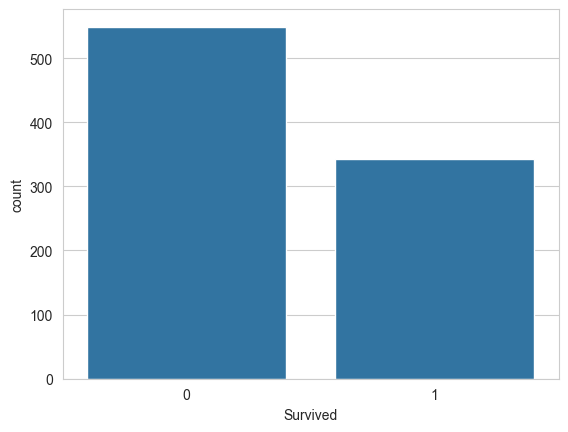

In [314]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_df)

This shows how many passengers survived and how many died.

<Axes: xlabel='Sex', ylabel='count'>

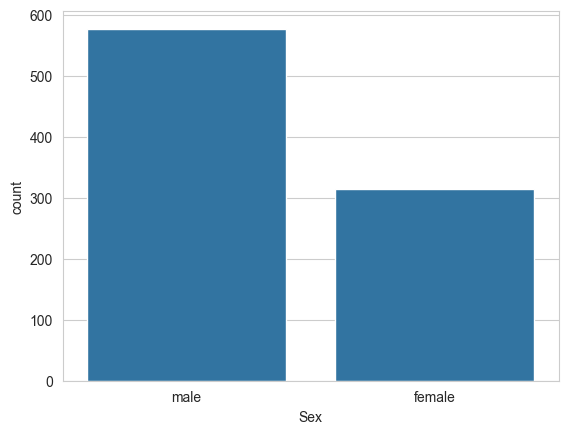

In [315]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=titanic_df)

In [316]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Males were the majority passengers.

In [317]:
titanic_df.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

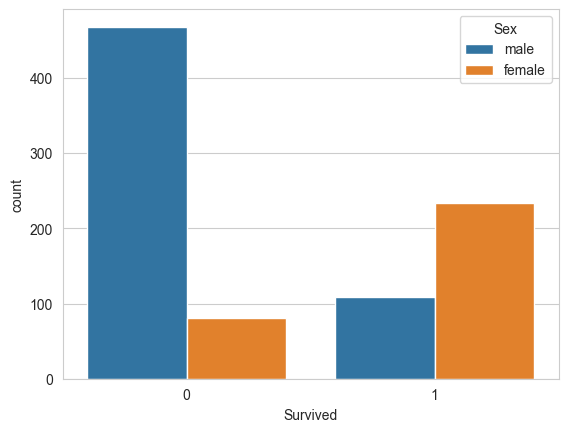

In [318]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df)

Most of the survivors were Females despite when men were in more numbers.

<Axes: xlabel='Pclass', ylabel='count'>

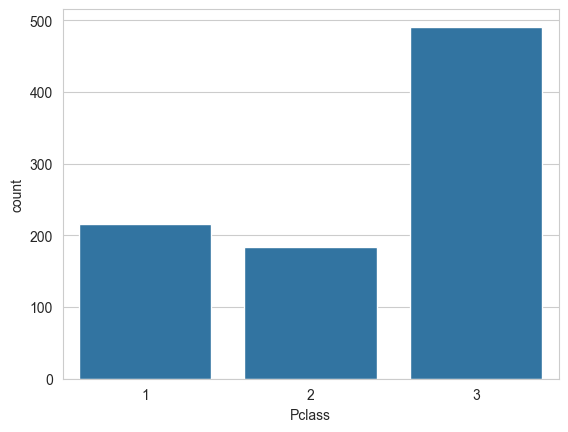

In [319]:
sns.countplot(x='Pclass', data=titanic_df)

<Axes: xlabel='Survived', ylabel='count'>

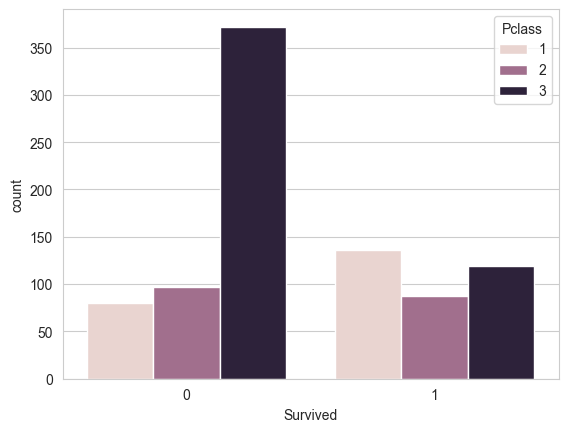

In [320]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)

In [321]:
titanic_df.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [322]:
titanic_df.groupby(['Survived', 'Pclass', 'Sex']).size()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64

- Upper class passengers had higher chance of survival
- Lower class passengers had lower chance of survuval
- The third class had a higher proportion of men compared to women, it is worth noting the famous protocol "Women and children first" followed by the ship's administration when allocating lifeboat seats. This protocol prioritized women and children for the lifeboats during the Titanic's evacuation process.

<Axes: xlabel='Sex', ylabel='count'>

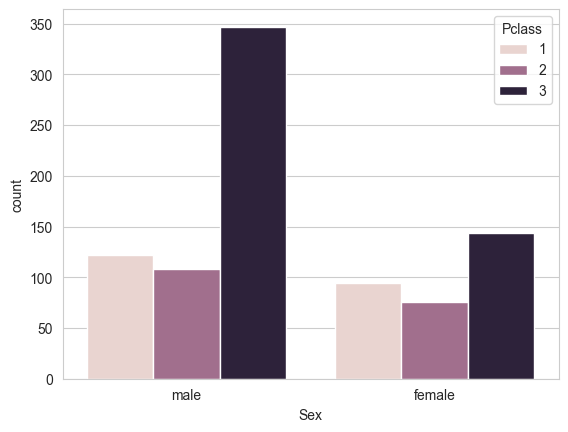

In [323]:
sns.countplot(x='Sex', hue='Pclass', data=titanic_df)

In [324]:
titanic_df.groupby(['Sex', 'Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

<Axes: >

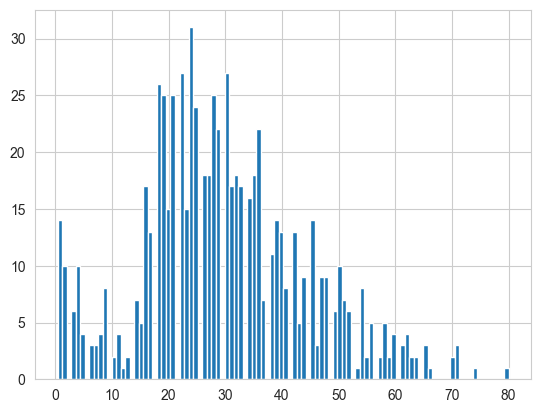

In [325]:
titanic_df['Age'].hist(bins=100)

<Axes: >

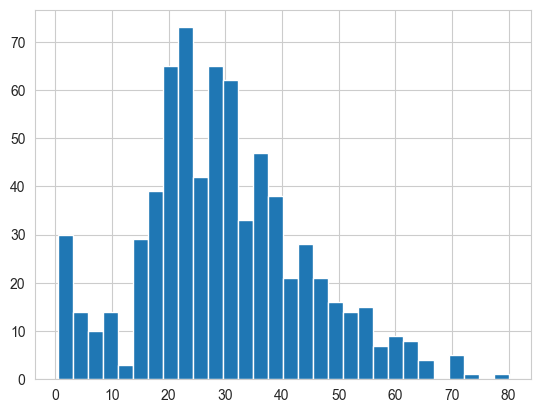

In [326]:
titanic_df['Age'].hist(bins=30)

In [327]:
titanic_df.groupby(['Survived', 'SibSp']).size()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

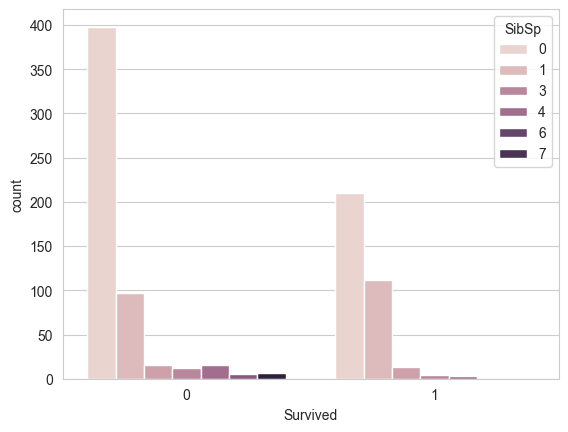

In [328]:
sns.countplot(x='Survived', hue='SibSp', data=titanic_df)

The attribute "Embarked" provides information about the passengers port of embarkation with 
- 'C' representing Cherbourg
- 'Q' representing Queenstown
- 'S' representing Southampton

<Axes: xlabel='Embarked', ylabel='count'>

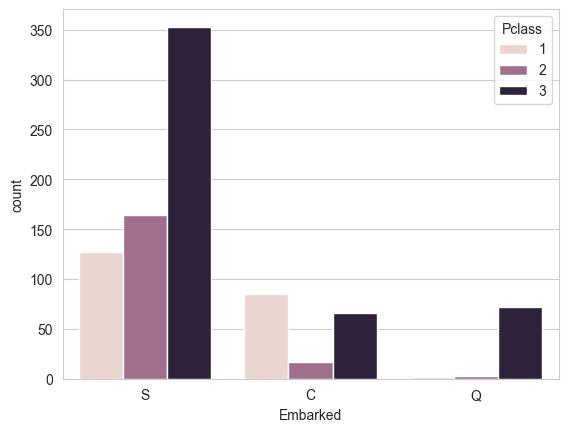

In [329]:
sns.countplot(x='Embarked', hue='Pclass', data=titanic_df)

In [330]:
titanic_df.groupby(['Embarked', 'Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

In [331]:
# info for newspaper (¬_¬").ᐟ
titanic_df.groupby(['Embarked', 'Pclass', 'Sex', 'Survived']).size()

Embarked  Pclass  Sex     Survived
C         1       female  0             1
                          1            42
                  male    0            25
                          1            17
          2       female  1             7
                  male    0             8
                          1             2
          3       female  0             8
                          1            15
                  male    0            33
                          1            10
Q         1       female  1             1
                  male    0             1
          2       female  1             2
                  male    0             1
          3       female  0             9
                          1            24
                  male    0            36
                          1             3
S         1       female  0             2
                          1            46
                  male    0            51
                          1            28

### DataSet Cleaning Objectives
- removing NaN values either by filling or dropping
- converting categorical data into numeric
- dropping columns on no use

In [332]:
titanic_df['Age'].mean()

# but substituting this mean age at the missing place will not be worthy
# instead we can do this with respect to the passenger class

np.float64(29.69911764705882)

In [333]:
titanic_df.groupby(by='Pclass')['Age'].mean()

# every class have different mean values of the passengers age
# from the results we can clearly say that -
    # the younger people had booked the lower class ( third class and second class )
    # the middle age people had booked the upper class ( first class )

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [334]:
#
def filling_age(x):
    Pclass = x.iloc[0]
    Age = x.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return(Age)

df2 = titanic_df
df2['Age'] = titanic_df[['Pclass', 'Age']].apply(filling_age, axis=1)

<Axes: >

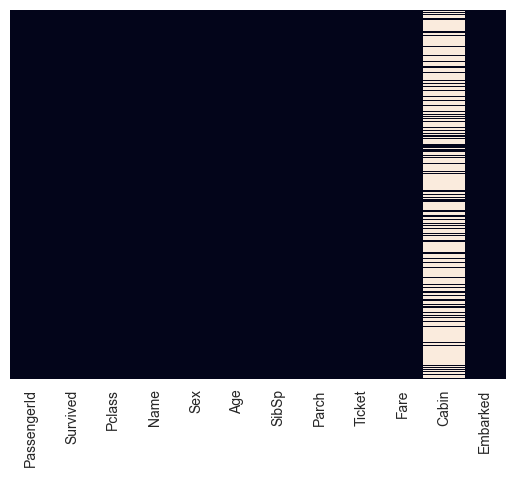

In [335]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False)
# now the missing values in Age column are gone

In [336]:
# don't know what to do with 'Cabin' col
# so i'm dropping it

df2.drop('Cabin', axis=1, inplace=True)  # in original dataframe df2

<Axes: >

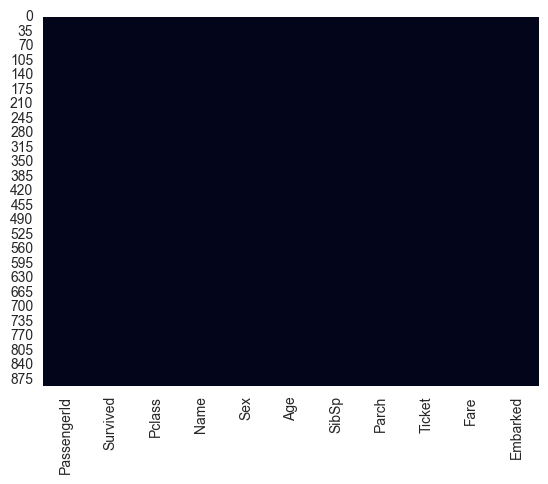

In [337]:
sns.heatmap(df2.isnull(), cbar=False)

In [338]:
df2.isnull().sum()
# we can see the null values now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [339]:
df3 = df2.dropna().copy()  # new dataframe which will have no NaN values
                    # we can do all this in the first titanic_df but after modyfing the earlier visuals are effected on restart

df3.isnull().sum()  # no NaN 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [340]:
# cagetorical data -> converting into numerical

sex = pd.get_dummies(df3['Sex'], drop_first=True, dtype=int)   # only want one column,
# sex

In [341]:
embark = pd.get_dummies(df3['Embarked'], drop_first=True, dtype=int)   # only want one column,
# embark

In [342]:
# removing 
df3.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [344]:
# adding
df3 = pd.concat([df3, sex, embark], axis=1)
df3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
